#Project Summary-

Dataset list all shows available on Amazon Prime Streaming, it has 2 csv files which has data as follows   

id- title id   
title - name of the show or movie   
type- Movie/Show   
release Year- the release year   
runtime - length of episode i.e show or movie   
genres - category movie or show belongs to   
'production_countries'- name of countries where movie or show was released
'seasons'- number of seasons   
'imdb_id'- title ID   
'imdb_score'-score on imdb   
'imdb_votes'- votes on imdb    
'tmdb_popularity'- popularity on tmdb    
'tmdb_score'- score on tmdb    
role - actor/director    
character - character name    
name - real name of actor/director    

#Problem Statement-

what genre and category dominate the platform?
how does content diversity vary across different regions?
how has amazon prime content library evolved over years?
what are highest rated and most popular shows on Platform?

##Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

##Import Dataset

In [ ]:
df1 = pd.read_csv('/content/credits.csv')
df2 = pd.read_csv('/content/titles.csv')

##Merge Dataset

In [ ]:
data= pd.merge(df1,df2)

In [ ]:
data.keys()

Index(['name', 'character', 'role', 'title', 'type', 'description',
       'release_year', 'age_certification', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

##Checking for null values

In [ ]:
data.isnull().sum()

,0
person_id,0
id,0
name,0
character,16307
role,0
title,0
type,0
description,91
release_year,0
age_certification,67640


##Checking for duplicates

In [ ]:
data.duplicated().sum()

168

#Dropping unnecessary columns

In [ ]:
data = data.drop(['person_id','id'],axis=1)

##Dropping Duplicates

In [ ]:
data=data.drop_duplicates()

In [ ]:
data.shape

(124166, 17)

#Finding Numeric and non numeric Columns and filling null values by 'non_available' Text for object column and mean for int/float column

In [ ]:
numeric_cols = [i for i in data.columns if data[i].dtypes in ('int64','float64')]
for i,col in enumerate(numeric_cols):
    data[col]= data[col].fillna(data[col].mean())

In [ ]:
numeric_cols

['release_year',
 'runtime',
 'seasons',
 'imdb_score',
 'imdb_votes',
 'tmdb_popularity',
 'tmdb_score']

In [ ]:
non_numeric_cols = [i for i in data.columns if data[i].dtypes == 'object']

for i,col in enumerate(non_numeric_cols):
    data[col]= data[col].fillna("Not_Available")

In [ ]:
non_numeric_cols

['name',
 'character',
 'role',
 'title',
 'type',
 'description',
 'age_certification',
 'genres',
 'production_countries',
 'imdb_id']

#Knowing Data information,Shape(No.of rows and columns) and Description

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124166 entries, 0 to 124346
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   name                  124166 non-null  object 
 1   character             124166 non-null  object 
 2   role                  124166 non-null  object 
 3   title                 124166 non-null  object 
 4   type                  124166 non-null  object 
 5   description           124166 non-null  object 
 6   release_year          124166 non-null  int64  
 7   age_certification     124166 non-null  object 
 8   runtime               124166 non-null  int64  
 9   genres                124166 non-null  object 
 10  production_countries  124166 non-null  object 
 11  seasons               124166 non-null  float64
 12  imdb_id               124166 non-null  object 
 13  imdb_score            124166 non-null  float64
 14  imdb_votes            124166 non-null  float64
 15  tmdb_

In [ ]:
data.shape

(124166, 17)

In [ ]:
data.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,124166.000000,124166.000000,124166.000000,124166.000000,1.241660e+05,124166.000000,124166.000000
mean,1996.305736,95.577960,2.338118,5.968299,2.327816e+04,10.178571,5.991426
std,27.752669,30.166456,0.802034,1.211564,8.627332e+04,40.764919,1.265867
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1983.000000,83.000000,2.338118,5.300000,3.160000e+02,1.886000,5.400000
50%,2009.000000,93.000000,2.338118,6.000000,1.472000e+03,3.896000,6.000000
75%,2017.000000,109.000000,2.338118,6.800000,1.002600e+04,8.801000,6.800000
max,2022.000000,540.000000,49.000000,9.900000,1.133692e+06,1437.906000,10.000000


#Finding UNIQUE values and length of UNIQUE values for Each Columns

In [204]:
features = ['character', 'role', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score']
for i,col in enumerate(features):
    print(f'\033[1m the unique values for column {col}\033[0m are  \n \n{data[col].unique()}\n and the length of unique values is {data[col].nunique()}\n\n')


 the unique values for column character are  
 
['Joe' 'Moe' 'Larry' ... 'Sanjay Thakur' 'Budhiya' 'Gissu']
 and the length of unique values is 71098


 the unique values for column role are  
 
['ACTOR' 'DIRECTOR']
 and the length of unique values is 2


 the unique values for column title are  
 
['The Three Stooges' 'The General' 'The Best Years of Our Lives' ...
 'Jay Nog: Something from Nothing' 'Chasing' 'Baikunth']
 and the length of unique values is 8748


 the unique values for column type are  
 
['SHOW' 'MOVIE']
 and the length of unique values is 2


 the unique values for column description are  
 
["The Three Stooges were an American vaudeville and comedy team active from 1922 until 1970, best known for their 190 short subject films by Columbia Pictures that have been regularly airing on television since 1958. Their hallmark was physical farce and slapstick. In films, the stooges were commonly known by their actual first names. There were a total of six stooges over the a

#finding Value Counts

In [207]:
age_certification_count = data['age_certification'].value_counts().head(6)[1:]
print(f'\033[1m the top 5 age_certification are\033[0m \n {age_certification_count}')

 the top 5 age_certification are 
 age_certification
R        25930
PG-13    12489
PG        9617
G         3839
TV-MA     1732
Name: count, dtype: int64


In [208]:
character_count = data['character'].value_counts().head(6)[1:]
print(f'\033[1mthe top 5 character count are\033[0m \n {character_count}')

the top 5 character count are 
 character
Himself     1540
Self        1245
Herself      418
Henchman     237
Dancer       221
Name: count, dtype: int64


In [ ]:
data['genres'].head()

,genres
0,"['comedy', 'family', 'animation', 'action', 'f..."
1,"['comedy', 'family', 'animation', 'action', 'f..."
2,"['comedy', 'family', 'animation', 'action', 'f..."
3,"['action', 'drama', 'war', 'western', 'comedy'..."
4,"['action', 'drama', 'war', 'western', 'comedy'..."


In [ ]:
data['genres']= data['genres'].apply(lambda x:x[2:-2])

In [ ]:
data['genres'].head()

,genres
0,"comedy', 'family', 'animation', 'action', 'fan..."
1,"comedy', 'family', 'animation', 'action', 'fan..."
2,"comedy', 'family', 'animation', 'action', 'fan..."
3,"action', 'drama', 'war', 'western', 'comedy', ..."
4,"action', 'drama', 'war', 'western', 'comedy', ..."


In [ ]:
data.dtypes

,0
name,object
character,object
role,object
title,object
type,object
description,object
release_year,int64
age_certification,object
runtime,int64
genres,object


plotting age_certification Vs type

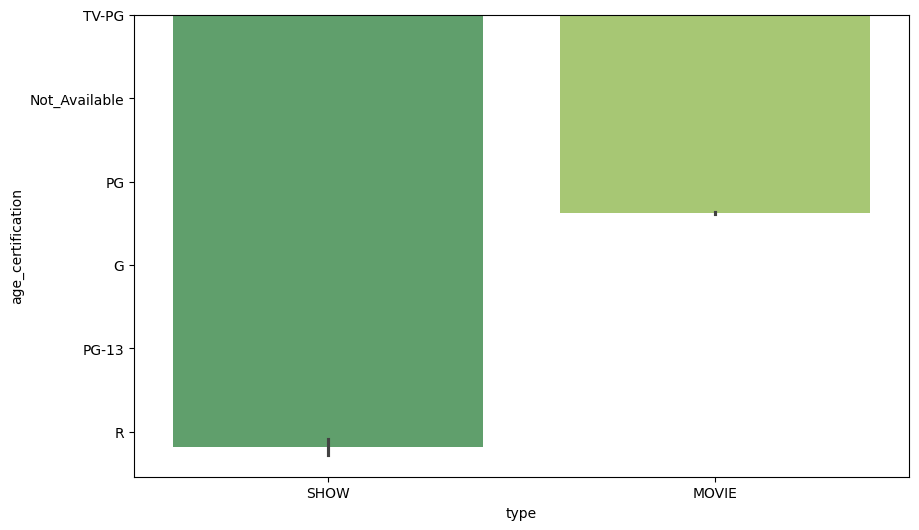

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=data,x='type',y='age_certification',palette='summer')
plt.show()

**Show type has more age_certification compared to Movie Type**

separating show and movie data


In [ ]:
data_show = data[data['type']=='SHOW']
data_movie = data[data['type']=='MOVIE']

***finding top 5 title as per score,ratings,votes,popularity***

In [220]:
features=['imdb_score','imdb_votes', 'tmdb_popularity', 'tmdb_score']
#plt.subplots(figsize=(10,6))
for i,col in enumerate(features):
  #plt.subplot(1,4,i+1)
  imdb_show=data_show.groupby(['title',col]).agg(imdb_show=(col,'count')).sort_values(by=col,ascending=False).head()
  imdb_movie=data_movie.groupby(['title',col]).agg(imdb_movie=(col,'count')).sort_values(by=col,ascending=False).head()
  #imdb_show.unstack().plot(legend=False)
  print(f'\033[1m the top 5 title of type show with {col} are \033[0m \n {imdb_show} \n')
  print(f'\033[1mthe top 5 title of type movie with {col} are \033[0m \n {imdb_movie} \n')


 the top 5 title of type show with imdb_score are  
                                       imdb_show
title                     imdb_score           
Couple of Mirrors         9.5                 7
The Chosen                9.4                 9
Clarkson's Farm           9.1                 4
Harmony with A. R. Rahman 9.1                 2
Corazón Contento          9.0                17 

the top 5 title of type movie with imdb_score are  
                                                imdb_movie
title                              imdb_score            
Pawankhind                         9.9                 19
Tari Sathe                         9.4                  2
Jai Bhim                           9.3                 26
Pazhagiya Naatkal                  9.3                  1
Alexander Babu: Alex in Wonderland 9.2                  1 

 the top 5 title of type show with imdb_votes are  
                                   imdb_show
title                 imdb_votes           
Dexter 

the show 'title' with highest imdb_score is **'Couple of Mirrors'**   
the show 'title' with highest imdb_votes is **Dexter**                   
the show 'title' with highest tmdb_score is **Lov3**                               
the show 'title' with highest tmdb_popularity is **Harina**             
the movie 'title' with highest imdb_score is **Pawankhind**                           
the movie 'title' with highest imdb_votes is **Titanic**                
the movie 'title' with highest tmdb_score is **Man from Cheyenne**   
the movie 'title' with highest tmdb_popularity is **All the Old Knives**

***finding top 5 genres as per score,ratings,votes,popularity***

In [219]:
features=['imdb_score','imdb_votes', 'tmdb_popularity', 'tmdb_score']
#plt.subplots(figsize=(10,6))
for i,col in enumerate(features):
  #plt.subplot(1,4,i+1)
  imdb_show=data_show.groupby(['genres',col]).agg(imdb_show=(col,'count')).sort_values(by=col,ascending=False).head()
  imdb_movie=data_movie.groupby(['genres',col]).agg(imdb_movie=(col,'count')).sort_values(by=col,ascending=False).head()
  #imdb_show.unstack().plot(legend=False)
  print(f'\033[1mthe top 5 genres of show type with {col} are \033[0m \n {imdb_show} \n')
  print(f'\033[1mthe top 5 genres of movie type with {col} are \n \033[0m {imdb_movie} \n')

the top 5 genres of show type with imdb_score are  
                                                imdb_show
genres                             imdb_score           
drama', 'romance', 'crime          9.5                 7
drama', 'history                   9.4                 9
documentation                      9.1                 2
reality', 'documentation', 'comedy 9.1                 4
comedy', 'drama                    9.0                17 

the top 5 genres of movie type with imdb_score are 
                                         imdb_movie
genres                     imdb_score            
action', 'drama', 'history 9.9                 19
drama', 'family            9.4                  2
drama                      9.3                  1
drama', 'crime             9.3                 26
family', 'drama            9.2                  7 

the top 5 genres of show type with imdb_votes are  
                                                                imdb_show
genres        

the genre in show type with highest imdb_score is    **[drama', 'romance', 'crime]**

the  genre in movie type with highest imdb_score is  **[action', 'drama', 'history]**

the genre in show with highest imdb_votes is
**[drama', 'thriller', 'crime]**  

the genre in movie with highest  imdb_votes is
**[drama', 'romance]**        

the genre in show with highest  tmdb_popularity is **comedy**   

the genre in movie with highest  tmdb_popularity is **thriller**      

the genre in show with highest  tmdb_score is
**[drama', 'romance', 'comedy', 'history]**

the genre in movie with highest  tmdb_score is
**[crime', 'scifi', 'action]**  


***finding top 5 actors and directors  as per score,ratings,votes,popularity***

In [222]:
actor_show = data_show[data_show['role']=='ACTOR']
director_show = data_show[data_show['role']=='DIRECTOR']

In [226]:
features=['imdb_score','imdb_votes', 'tmdb_popularity', 'tmdb_score']
#plt.subplots(figsize=(10,6))
for i,col in enumerate(features):
  #plt.subplot(1,4,i+1)
  imdb_show=actor_show.groupby(['name',col]).agg(imdb_show=(col,'count')).sort_values(by=col,ascending=False).head()
  imdb_movie=director_show.groupby(['name',col]).agg(imdb_movie=(col,'count')).sort_values(by=col,ascending=False).head()
  #imdb_show.unstack().plot(legend=False)
  print(f'\033[1mthe top 5 actors of show type with {col} are \033[0m \n {imdb_show} \n')
  print(f'\033[1mthe top 5 directors of show type with {col} are \n \033[0m {imdb_movie} \n')

the top 5 actors of show type with imdb_score are  
                          imdb_show
name         imdb_score           
He Fengtian  9.5                 1
Sun Yihan    9.5                 1
Zhang Nan    9.5                 1
Liu Zhiyang  9.5                 1
Huang Xinyao 9.5                 1 

the top 5 directors of show type with imdb_score are 
                                         imdb_movie
name                       imdb_score            
Gavin Whitehead            9.1                  1
Sruti Harihara Subramanian 9.1                  1
Adrian Brown               8.9                  1
Paul Leluc                 8.9                  1
Deepak Kumar Mishra        8.8                  1 

the top 5 actors of show type with imdb_votes are  
                                imdb_show
name               imdb_votes           
Michael C. Hall    711566.0            1
Jennifer Carpenter 711566.0            1
Geoff Pierson      711566.0            1
C.S. Lee           711566.0       

the actor of show type with highest imdb_score is
**He Fengtian**    
the director of show type with highest imdb_score is
**Gavin Whitehead**    
the actor of show type with highest imdb_votes is **Michael C. Hall**    
the director of show type with highest imdb_votes is
**Deepak Kumar Mishra**   
the actor of show type with highest tmdb_popularity is
**Miguel Pérez Gil**   
the director of show type with highest tmdb_popularity is **Rigoberto Castañeda**   
the actor of show type with highest tmdb_score is
**Lawrence Ng**   
the director of show type with highest tmdb_score is
**Takeshi Yagi**  

In [ ]:
actor_movie = data_movie[data_movie['role']=='ACTOR']
director_movie = data_movie[data_movie['role']=='DIRECTOR']

In [221]:
features=['imdb_score','imdb_votes', 'tmdb_popularity', 'tmdb_score']
#plt.subplots(figsize=(10,6))
for i,col in enumerate(features):
  #plt.subplot(1,4,i+1)
  imdb_show=actor_movie.groupby(['name',col]).agg(imdb_show=(col,'count')).sort_values(by=col,ascending=False).head()
  imdb_movie=director_movie.groupby(['name',col]).agg(imdb_movie=(col,'count')).sort_values(by=col,ascending=False).head()
  #imdb_show.unstack().plot(legend=False)
  print(f'\033[1mthe top 5 actors of movie type with {col} are \033[0m \n {imdb_show} \n')
  print(f'\033[1mthe top 5 director of movie type with {col} are \n \033[0m {imdb_movie} \n')

the top 5 actors of movie type with imdb_score are  
                                  imdb_show
name                 imdb_score           
Dipti Ketkar         9.9                 1
Sameer Dharmadhikari 9.9                 1
Madhavi Nimkar       9.9                 1
Surabhi Bhave        9.9                 1
Akshay Waghmare      9.9                 1 

the top 5 director of movie type with imdb_score are 
                                   imdb_movie
name                 imdb_score            
Digpal Lanjekar      9.9                  1
T S Suresh Babu      9.3                  1
T. J. Gnanavel       9.3                  1
P. Amudhavanan       9.2                  1
Sudha Kongara Prasad 9.2                  1 

the top 5 actors of movie type with imdb_votes are  
                                imdb_show
name               imdb_votes           
Shay Duffin        1133692.0           1
Mark Rafael Truitt 1133692.0           1
Mark Capri         1133692.0           1
Gloria Stuart     

the actor of movie type with highest imdb_score is **Dipti Ketkar**   
the director of movie type with highest imdb_score is **Digpal Lanjekar**   
the actor of movie type with highest imdb_votes is **Shay Duffin**   
the director of movie type with highest imdb_votes is **James Cameron**   
the actor of movie type with highest tmdb_popularity is **Kasia Madera**  
the director of movie type with highest tmdb_popularity is **Janus Metz**   
the actor of movie type with highest tmdb_score is **"Daddy" Gene Jackson**  
the director of movie type with highest tmdb_score is **Mohammad Hadi Karimi**

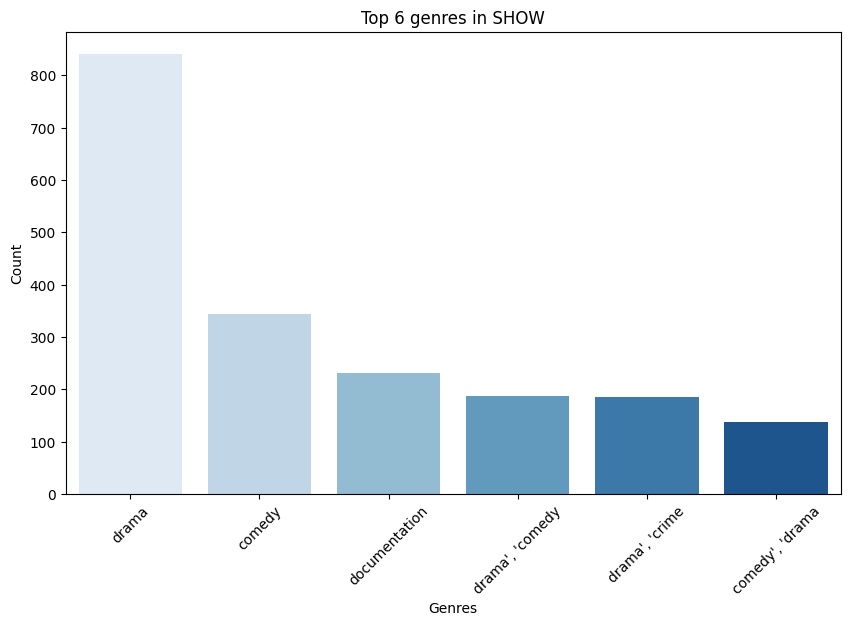

In [212]:
genre_show = data_show['genres'].value_counts().head(6)
#print(f'\033[1m top 6 genres in SHOW are {genre_show} \033[0m \n')
plt.figure(figsize=(10,6))
sns.barplot(x=genre_show.index,y=genre_show.values,palette= "Blues")
plt.title('Top 6 genres in SHOW')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# in type SHOW, Drama is the most watched Genre on Amazon Prime

In [ ]:
max(data_show['imdb_score'])

9.5

In [ ]:
data_show[data_show['genres']=='drama'].groupby(['genres','imdb_score']).agg(imdb=('imdb_score','count')).sort_values(by='imdb_score',ascending=False).head(1)

,,imdb
genres,imdb_score,
drama,8.4,7


#imdb_score of most watched Genre is also high, so there is high corelation between imdb_score and Genre of type show

In [ ]:
features=["drama","comedy","documentation","'drama', 'comedy'","drama', 'crime","comedy', 'drama"]
for i,col in enumerate(features):
  print(data_show[data_show['genres']==col].groupby(['genres','imdb_score']).agg(imdb=('imdb_score','count')).sort_values(by='imdb_score',ascending=False).head(1))

                   imdb
genres imdb_score      
drama  8.4            7
                   imdb
genres imdb_score      
comedy 8.5            8
                          imdb
genres        imdb_score      
documentation 9.1            2
Empty DataFrame
Columns: [imdb]
Index: []
                           imdb
genres         imdb_score      
drama', 'crime 8.3            8
                            imdb
genres          imdb_score      
comedy', 'drama 9.0           17


# This show imdb_score is highly correlated with Genre

In [ ]:
max(data_show['tmdb_score'])

10.0

In [ ]:
features=["drama","comedy","documentation","'drama', 'comedy'","drama', 'crime","comedy', 'drama"]
for i,col in enumerate(features):
  print(data_show[data_show['genres']==col].groupby(['genres','tmdb_score']).agg(votes=('tmdb_score','count')).sort_values(by='tmdb_score',ascending=False).head(1))

                   votes
genres tmdb_score       
drama  9.0            51
                   votes
genres tmdb_score       
comedy 9.0             6
                          votes
genres        tmdb_score       
documentation 10.0            4
Empty DataFrame
Columns: [votes]
Index: []
                           votes
genres         tmdb_score       
drama', 'crime 8.7            16
                            votes
genres          tmdb_score       
comedy', 'drama 10.0           17


#high tmdb_score impacts genre popularity in SHOW type


In [ ]:
max(data_show['imdb_votes'])

711566.0

In [ ]:
features=["drama","comedy","documentation","'drama', 'comedy'","drama', 'crime","comedy', 'drama"]
for i,col in enumerate(features):
  print(data_show[data_show['genres']==col].groupby(['genres','imdb_votes']).agg(votes=('imdb_votes','count')).sort_values(by='imdb_votes',ascending=False).head(1))

                   votes
genres imdb_votes       
drama  91287.0         7
                   votes
genres imdb_votes       
comedy 252564.0        8
                            votes
genres        imdb_votes         
documentation 23278.163001    108
Empty DataFrame
Columns: [votes]
Index: []
                           votes
genres         imdb_votes       
drama', 'crime 85387.0         8
                            votes
genres          imdb_votes       
comedy', 'drama 251172.0        7


# This show imdb_votes is not correlated with Genre

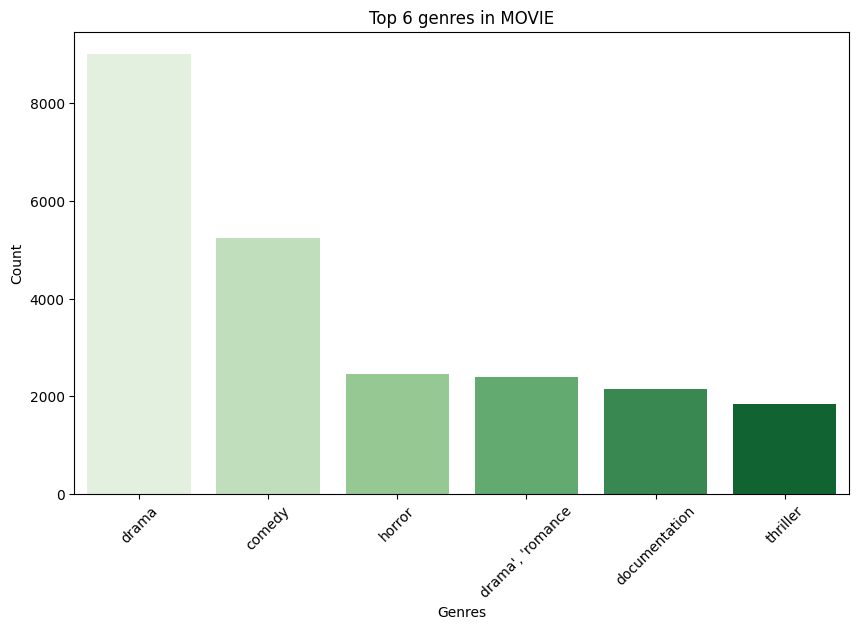

In [213]:
genre_movie = data_movie['genres'].value_counts().head(6)
#print(f'\033[1m top 6 genres in MOVIE are {genre_movie} \033[0m')
plt.figure(figsize=(10,6))
sns.barplot(x=genre_movie.index,y=genre_movie.values,palette= "Greens")
plt.title('Top 6 genres in MOVIE')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# in type MOVIE, Drama is the most watched Genre on Amazon Prime

In [ ]:
max(data_movie['tmdb_score'])

10.0

In [ ]:
features=['drama','comedy','horror',"drama', 'romance",'documentation','thriller']
for i,col in enumerate(features):
  score=data_movie[data_movie['genres']==col].groupby(['genres','tmdb_score']).agg(score=('tmdb_score','count')).sort_values(by='tmdb_score',ascending=False).head(1)
  print(score)
plt.show()

                   score
genres tmdb_score       
drama  10.0           37
                   score
genres tmdb_score       
comedy 10.0           47
                   score
genres tmdb_score       
horror 10.0           23
                             score
genres           tmdb_score       
drama', 'romance 10.0            1
                          score
genres        tmdb_score       
documentation 10.0           32
                     score
genres   tmdb_score       
thriller 9.0            10


#high tmdb_score impacts genre popularity in MOVIE type

In [ ]:
max(data_movie['imdb_score'])

9.9

In [ ]:
features=['drama','comedy','horror',"drama', 'romance",'documentation','thriller']
for i,col in enumerate(features):
  score=data_movie[data_movie['genres']==col].groupby(['genres','imdb_score']).agg(score=('imdb_score','count')).sort_values(by='imdb_score',ascending=False).head(1)
  print(score)
plt.show()

                   score
genres imdb_score       
drama  9.3             1
                   score
genres imdb_score       
comedy 9.2             1
                   score
genres imdb_score       
horror 7.5            40
                             score
genres           imdb_score       
drama', 'romance 8.2            22
                          score
genres        imdb_score       
documentation 9.1             7
                     score
genres   imdb_score       
thriller 8.0             6


#High imdb_score means highest watched genre of type movie

In [ ]:
max(data_movie['imdb_votes'])

1133692.0

In [ ]:
features=['drama','comedy','horror',"drama', 'romance",'documentation','thriller']
for i,col in enumerate(features):
  print(data_movie[data_movie['genres']==col].groupby(['genres','imdb_votes']).agg(score=('imdb_votes','count')).sort_values(by='imdb_votes',ascending=False).head(1))

                   score
genres imdb_votes       
drama  271170.0       50
                   score
genres imdb_votes       
comedy 299171.0      128
                   score
genres imdb_votes       
horror 126675.0       22
                             score
genres           imdb_votes       
drama', 'romance 1133692.0     118
                          score
genres        imdb_votes       
documentation 35312.0         9
                       score
genres   imdb_votes         
thriller 23278.163001    630


drama', 'romance genre has highest votes but still it not highest watched Genre, this means there is no positive correlation between genre and imdb_votes

In [ ]:
data_show = data[data['type']=='SHOW']
data_movie = data[data['type']=='MOVIE']

In [ ]:
actor_movie = data_movie[data_movie['role']=='ACTOR']
director_movie = data_movie[data_movie['role']=='DIRECTOR']

 top 5 SHOW actors are  name
Takahiro Sakurai      11
Nobuhiko Okamoto       7
Tara Strong            6
Toshiyuki Morikawa     6
Koki Uchiyama          6
Name: count, dtype: int64 



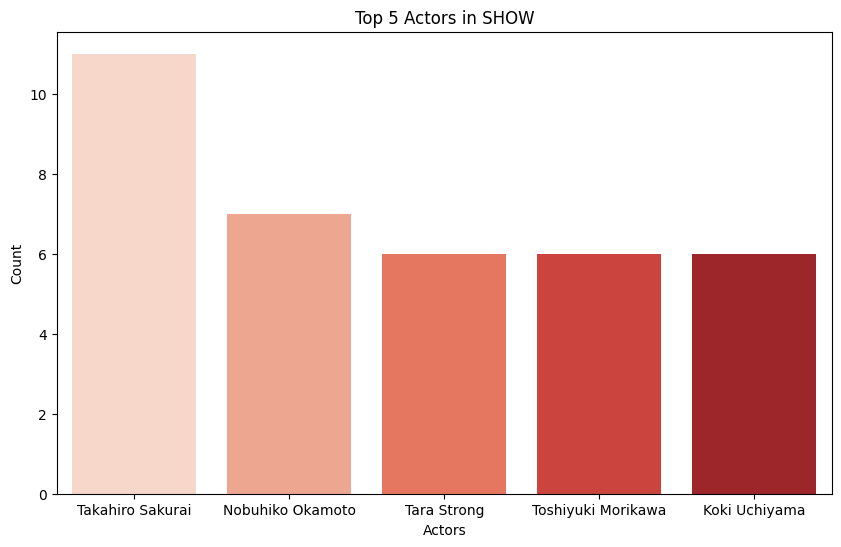

In [214]:
actor_SHOW = data_show[data_show['role']=='ACTOR']
show_actor_name = actor_SHOW['name'].value_counts().head(5)
print(f'\033[1m top 5 SHOW actors are \033[0m {show_actor_name} \n')
plt.figure(figsize=(10,6))
sns.barplot(x=show_actor_name.index,y=show_actor_name.values,palette="Reds")
plt.title('Top 5 Actors in SHOW')
plt.xlabel('Actors')
plt.ylabel('Count')
plt.show()

Actor **Takahiro Sakurai** has highest number of SHOWS  on Amazon Prime

In [ ]:
max(actor_movie['tmdb_score'])

10.0

In [ ]:
features=["Takahiro Sakurai","Nobuhiko Okamoto","Tara Strong","Toshiyuki Morikawa","Koki Uchiyama"]
for i,col in enumerate(features):
  print(actor_movie[actor_movie['name']==col].groupby(['name','tmdb_score']).agg(score=('tmdb_score','count')).sort_values(by='tmdb_score',ascending=False).head(1))

                             score
name             tmdb_score       
Takahiro Sakurai 5.8             1
Empty DataFrame
Columns: [score]
Index: []
                        score
name        tmdb_score       
Tara Strong 5.6             1
                               score
name               tmdb_score       
Toshiyuki Morikawa 6.6             1
                          score
name          tmdb_score       
Koki Uchiyama 8.5             1


tmdb_score has little impact on actor name of movie type

In [ ]:
max(actor_movie['imdb_score'])

9.9

In [ ]:
features=["Takahiro Sakurai","Nobuhiko Okamoto","Tara Strong","Toshiyuki Morikawa","Koki Uchiyama"]
for i,col in enumerate(features):
  print(actor_movie[actor_movie['name']==col].groupby(['name','imdb_score']).agg(score=('imdb_score','count')).sort_values(by='imdb_score',ascending=False).head(1))

                             score
name             imdb_score       
Takahiro Sakurai 6.9             1
Empty DataFrame
Columns: [score]
Index: []
                        score
name        imdb_score       
Tara Strong 4.1             1
                               score
name               imdb_score       
Toshiyuki Morikawa 6.4             1
                          score
name          imdb_score       
Koki Uchiyama 8.0             1


imdb_score,imdb_votes is not related to actor popularity

In [ ]:
max(actor_movie['imdb_votes'])

1133692.0

In [ ]:
features=["Takahiro Sakurai","Nobuhiko Okamoto","Tara Strong","Toshiyuki Morikawa","Koki Uchiyama"]
for i,col in enumerate(features):
  print(actor_movie[actor_movie['name']==col].groupby(['name','imdb_votes']).agg(score=('imdb_votes','count')).sort_values(by='imdb_votes',ascending=False).head(1))

                             score
name             imdb_votes       
Takahiro Sakurai 152.0           1
Empty DataFrame
Columns: [score]
Index: []
                        score
name        imdb_votes       
Tara Strong 610.0           1
                               score
name               imdb_votes       
Toshiyuki Morikawa 12276.0         1
                          score
name          imdb_votes       
Koki Uchiyama 8779.0          1


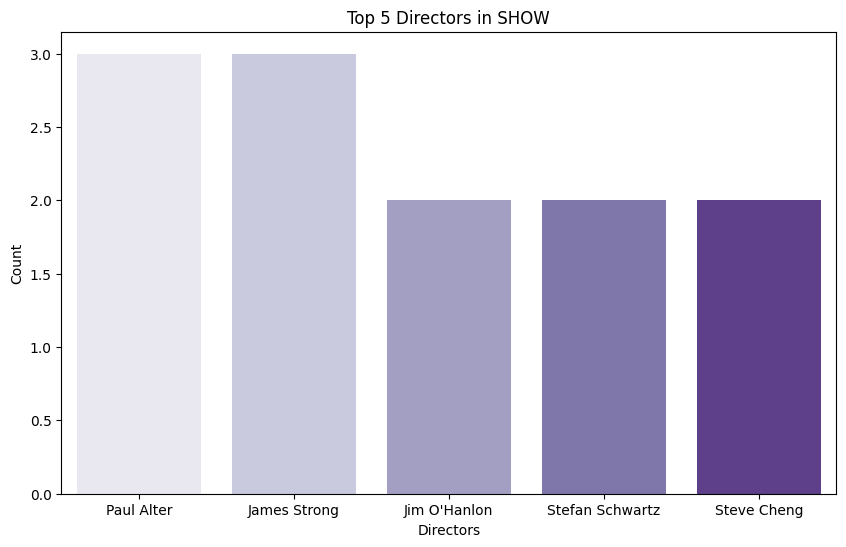

In [215]:
director_SHOW = data_show[data_show['role']=='DIRECTOR']
show_director_name = director_SHOW['name'].value_counts().head(5)
#print(f'\033[1mtop 5  OW directors are {show_director_name} \033[0m')
plt.figure(figsize=(10,6))
cmap = plt.get_cmap("magma")
sns.barplot(x=show_director_name.index,y=show_director_name.values,palette="Purples")
plt.title('Top 5 Directors in SHOW')
plt.xlabel('Directors')
plt.ylabel('Count')
plt.show()

Director **Paul Alter** has highest number of SHOWS  on Amazon Prime

In [ ]:
director_SHOW[director_SHOW['name']=='Steve Cheng'].groupby(['name','imdb_score']).agg(score=('imdb_score','count')).sort_values(by='imdb_score',ascending=False).head(1)

,,score
name,imdb_score,
Steve Cheng,8.8,1


In [ ]:
max(director_SHOW['tmdb_score'])

10.0

In [ ]:
features=["Paul Alter","James Strong","Jim O'Hanlon","Stefan Schwartz","Steve Cheng"]
for i,col in enumerate(features):
  print(director_SHOW[director_SHOW['name']==col].groupby(['name','tmdb_score']).agg(score=('tmdb_score','count')).sort_values(by='tmdb_score',ascending=False).head(1))

                       score
name       tmdb_score       
Paul Alter 7.8             1
                         score
name         tmdb_score       
James Strong 7.3             1
                         score
name         tmdb_score       
Jim O'Hanlon 7.6             1
                            score
name            tmdb_score       
Stefan Schwartz 7.0             1
                        score
name        tmdb_score       
Steve Cheng 9.1             1


tmdb_score for directoe of type show ranges between 7 to 9.1

In [ ]:
max(director_SHOW['imdb_score'])

9.1

In [ ]:
features=["Paul Alter","James Strong","Jim O'Hanlon","Stefan Schwartz","Steve Cheng"]
for i,col in enumerate(features):
  print(director_SHOW[director_SHOW['name']==col].groupby(['name','imdb_score']).agg(score=('imdb_score','count')).sort_values(by='imdb_score',ascending=False).head(1))

                       score
name       imdb_score       
Paul Alter 7.7             1
                         score
name         imdb_score       
James Strong 7.3             2
                         score
name         imdb_score       
Jim O'Hanlon 8.2             1
                            score
name            imdb_score       
Stefan Schwartz 7.9             1
                        score
name        imdb_score       
Steve Cheng 8.8             1


top 5 directors has received scores between 7.7 to 8.8

In [ ]:
max(director_movie['imdb_score'])

9.9

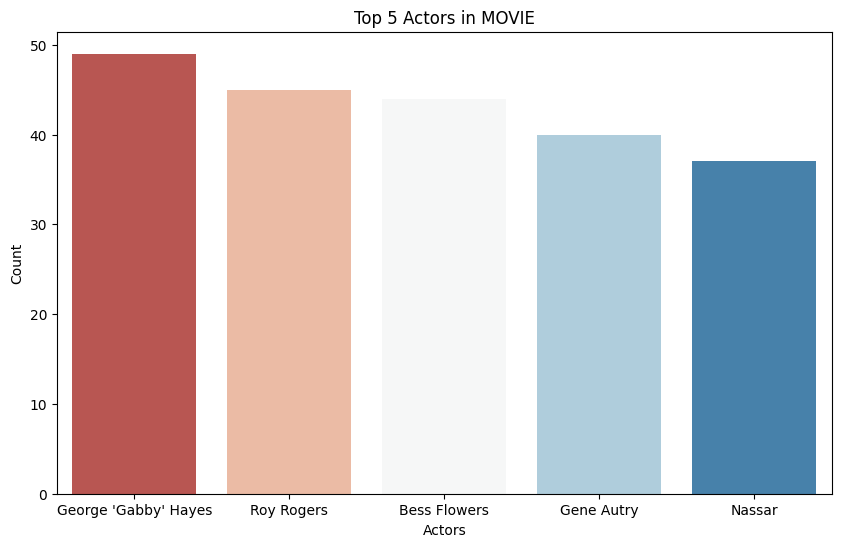

In [ ]:
movie_actor_name = actor_movie['name'].value_counts().head(5)
#print(f'\033[1m top 5 MOVIE actors are {movie_actor_name} \033[0m \n')
plt.figure(figsize=(10,6))
sns.barplot(x=movie_actor_name.index,y=movie_actor_name.values,palette="RdBu")
plt.title('Top 5 Actors in MOVIE')
plt.xlabel('Actors')
plt.ylabel('Count')
plt.show()

Actor  **George 'Gabby' Hayes** has highest number of MOVIES on Amazon Prime

In [ ]:
max(actor_movie['imdb_score'])

9.9

In [ ]:
feature=["George 'Gabby' Hayes","Roy Rogers","Bess Flowers","Gene Autry","Nassar"]
for i,col in enumerate(feature):
  print(actor_movie[actor_movie['name']==col].groupby(['name','imdb_score']).agg(score=('imdb_score','count')).sort_values(by='imdb_score',ascending=False).head(1))

                                 score
name                 imdb_score       
George 'Gabby' Hayes 6.8             1
                       score
name       imdb_score       
Roy Rogers 6.6             1
                         score
name         imdb_score       
Bess Flowers 8.0             1
                       score
name       imdb_score       
Gene Autry 7.1             1
                   score
name   imdb_score       
Nassar 8.2             1


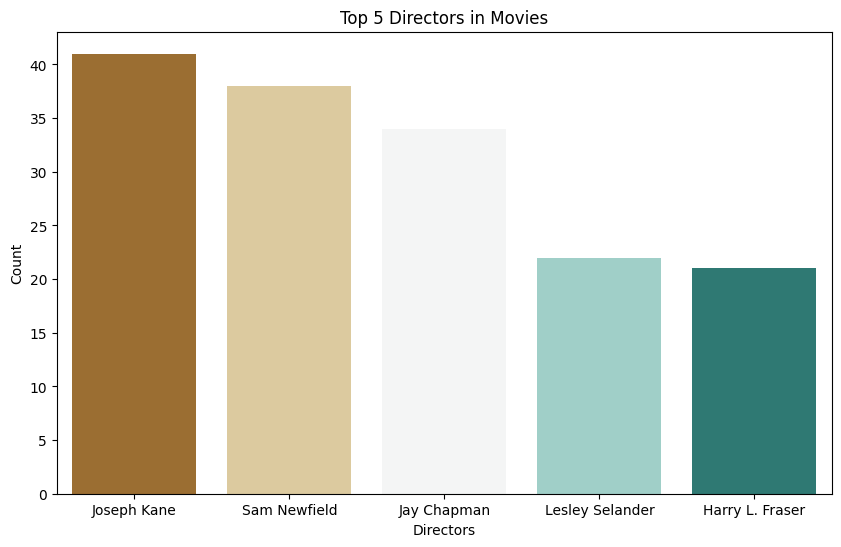

In [ ]:
movie_director_name = director_movie['name'].value_counts().head(5)
#print(f'\033[1m top 5 MOVIE directors are \033[0m {movie_director_name}')
plt.figure(figsize=(10,6))
sns.barplot(x=movie_director_name.index,y=movie_director_name.values,palette= "BrBG")
plt.title('Top 5 Directors in Movies')
plt.xlabel('Directors')
plt.ylabel('Count')
plt.show()

Director  **Joseph Kane**  has highest number of MOVIES  on Amazon Prime

In [ ]:
feature=["Joseph Kane","Sam Newfield","Jay Chapman","Lesley Selander","Harry L. Fraser"]
for i,col in enumerate(feature):
  print(director_movie[director_movie['name']==col].groupby(['name','imdb_score']).agg(score=('imdb_score','count')).sort_values(by='imdb_score',ascending=False).head(1))

                        score
name        imdb_score       
Joseph Kane 6.5             2
                         score
name         imdb_score       
Sam Newfield 6.8             1
                        score
name        imdb_score       
Jay Chapman 7.7             2
                            score
name            imdb_score       
Lesley Selander 7.1             1
                            score
name            imdb_score       
Harry L. Fraser 6.3             1


In [ ]:
data_show = data[data['type']=='SHOW']
data_movie = data[data['type']=='MOVIE']

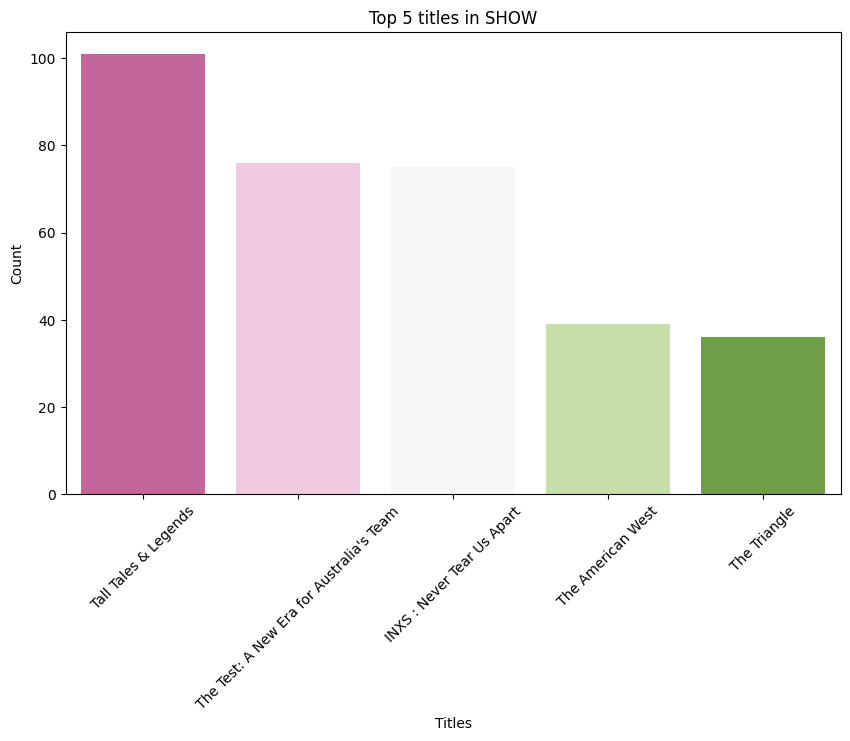

In [ ]:
title_show = data_show['title'].value_counts().head(5)
#print(f'top 5 titles in SHOW are {title_show} \n')
plt.figure(figsize = (10,6))
sns.barplot(x=title_show.index,y=title_show.values,palette="PiYG")
plt.title('Top 5 titles in SHOW')
plt.xlabel('Titles')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# the most watched title of Type Show is Tall Tales & Legends

In [ ]:
max(data_show['tmdb_score'])

10.0

In [ ]:
feature=["Tall Tales & Legends","The Test: A New Era for Australia's Team","INXS : Never Tear Us Apart","The American West","The Triangle"]
for i,col in enumerate(feature):
  print(data_show[data_show['title']==col].groupby(['title','tmdb_score']).agg(score=('tmdb_score','count')).sort_values(by='tmdb_score',ascending=False).head(1))

                                 score
title                tmdb_score       
Tall Tales & Legends 3.3           101
                                                     score
title                                    tmdb_score       
The Test: A New Era for Australia's Team 7.6            76
                                       score
title                      tmdb_score       
INXS : Never Tear Us Apart 6.0            75
                              score
title             tmdb_score       
The American West 6.8            39
                         score
title        tmdb_score       
The Triangle 6.3            36


titles are not impacted by tmdb_score

In [ ]:
max(data_show['imdb_score'])

9.5

In [ ]:
feature=["Tall Tales & Legends","The Test: A New Era for Australia's Team","INXS : Never Tear Us Apart","The American West","The Triangle"]
for i,col in enumerate(feature):
  print(data_show[data_show['title']==col].groupby(['title','imdb_score']).agg(score=('imdb_score','count')).sort_values(by='imdb_score',ascending=False).head(1))

                                 score
title                imdb_score       
Tall Tales & Legends 7.1           101
                                                     score
title                                    imdb_score       
The Test: A New Era for Australia's Team 8.9            76
                                       score
title                      imdb_score       
INXS : Never Tear Us Apart 7.7            75
                              score
title             imdb_score       
The American West 5.968299       39
                         score
title        imdb_score       
The Triangle 6.5            36


titles are not impacted by imdb_score       

In [ ]:
max(data_show['imdb_votes'])

711566.0

In [ ]:
feature=["Tall Tales & Legends","The Test: A New Era for Australia's Team","INXS : Never Tear Us Apart","The American West","The Triangle"]
for i,col in enumerate(feature):
  print(data_show[data_show['title']==col].groupby(['title','imdb_votes']).agg(score=('imdb_votes','count')).sort_values(by='imdb_votes',ascending=False).head(1))

                                 score
title                imdb_votes       
Tall Tales & Legends 183.0         101
                                                     score
title                                    imdb_votes       
The Test: A New Era for Australia's Team 3050.0         76
                                       score
title                      imdb_votes       
INXS : Never Tear Us Apart 1319.0         75
                                score
title             imdb_votes         
The American West 23278.163001     39
                         score
title        imdb_votes       
The Triangle 9191.0         36


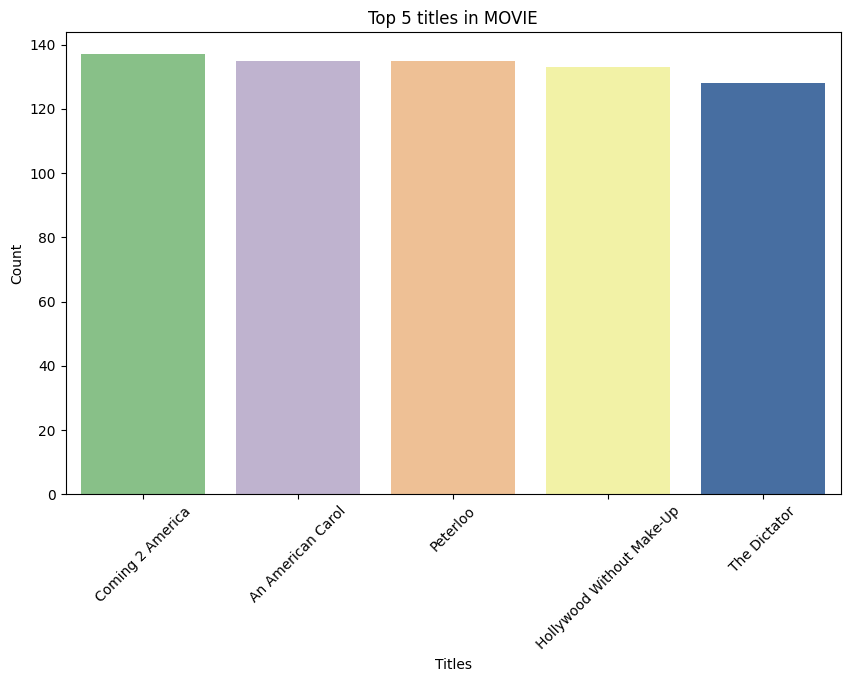

In [ ]:
title_movie = data_movie['title'].value_counts().head(5)
#print(f'\033[1m top 5 titles in MOVIE are \033[0m {title_movie} ')
plt.figure(figsize = (10,6))
sns.barplot(x=title_movie.index,y=title_movie.values,palette="Accent")
plt.title('Top 5 titles in MOVIE')
plt.xlabel('Titles')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# the most watched title of Type Movie is "Coming 2 America"

## Finding Top 5 count for each column

In [217]:
features = ['role', 'title', 'type', 'description', 'release_year',
        'runtime', 'genres', 'production_countries',
       'seasons',  'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score']

for i,col in enumerate(features):
    col_count = data[col].value_counts().head(5)
    #for j in range(0,len(col):
      #print(col_count.index[j])
      #if col_count.index[j]=='Not_Available':
        #col_count= col_count.drop(col_count.index[j])
      #else:
         # continue
    print(f'\n \033[1m top 5 {col}  is \033[0m \n {data[col].value_counts().head(6)}')





  top 5 role  is  
 role
ACTOR       115781
DIRECTOR      8385
Name: count, dtype: int64

  top 5 title  is  
 title
Coming 2 America             137
An American Carol            135
Peterloo                     135
Hollywood Without Make-Up    133
The Dictator                 128
Stage Door Canteen           124
Name: count, dtype: int64

  top 5 type  is  
 type
MOVIE    116015
SHOW       8151
Name: count, dtype: int64

  top 5 description  is  
 description
Prince Akeem Joffer is set to become King of Zamunda when he discovers he has a son he never knew about in America – a street savvy Queens native named Lavelle. Honoring his royal father's dying wish to groom this son as the crown prince, Akeem and Semmi set off to America once again.                                                                                                                         137
An epic portrayal of the events surrounding the infamous 1819 Peterloo Massacre, where a peaceful pro-democracy rally at St 

##Finding OUTLIERS

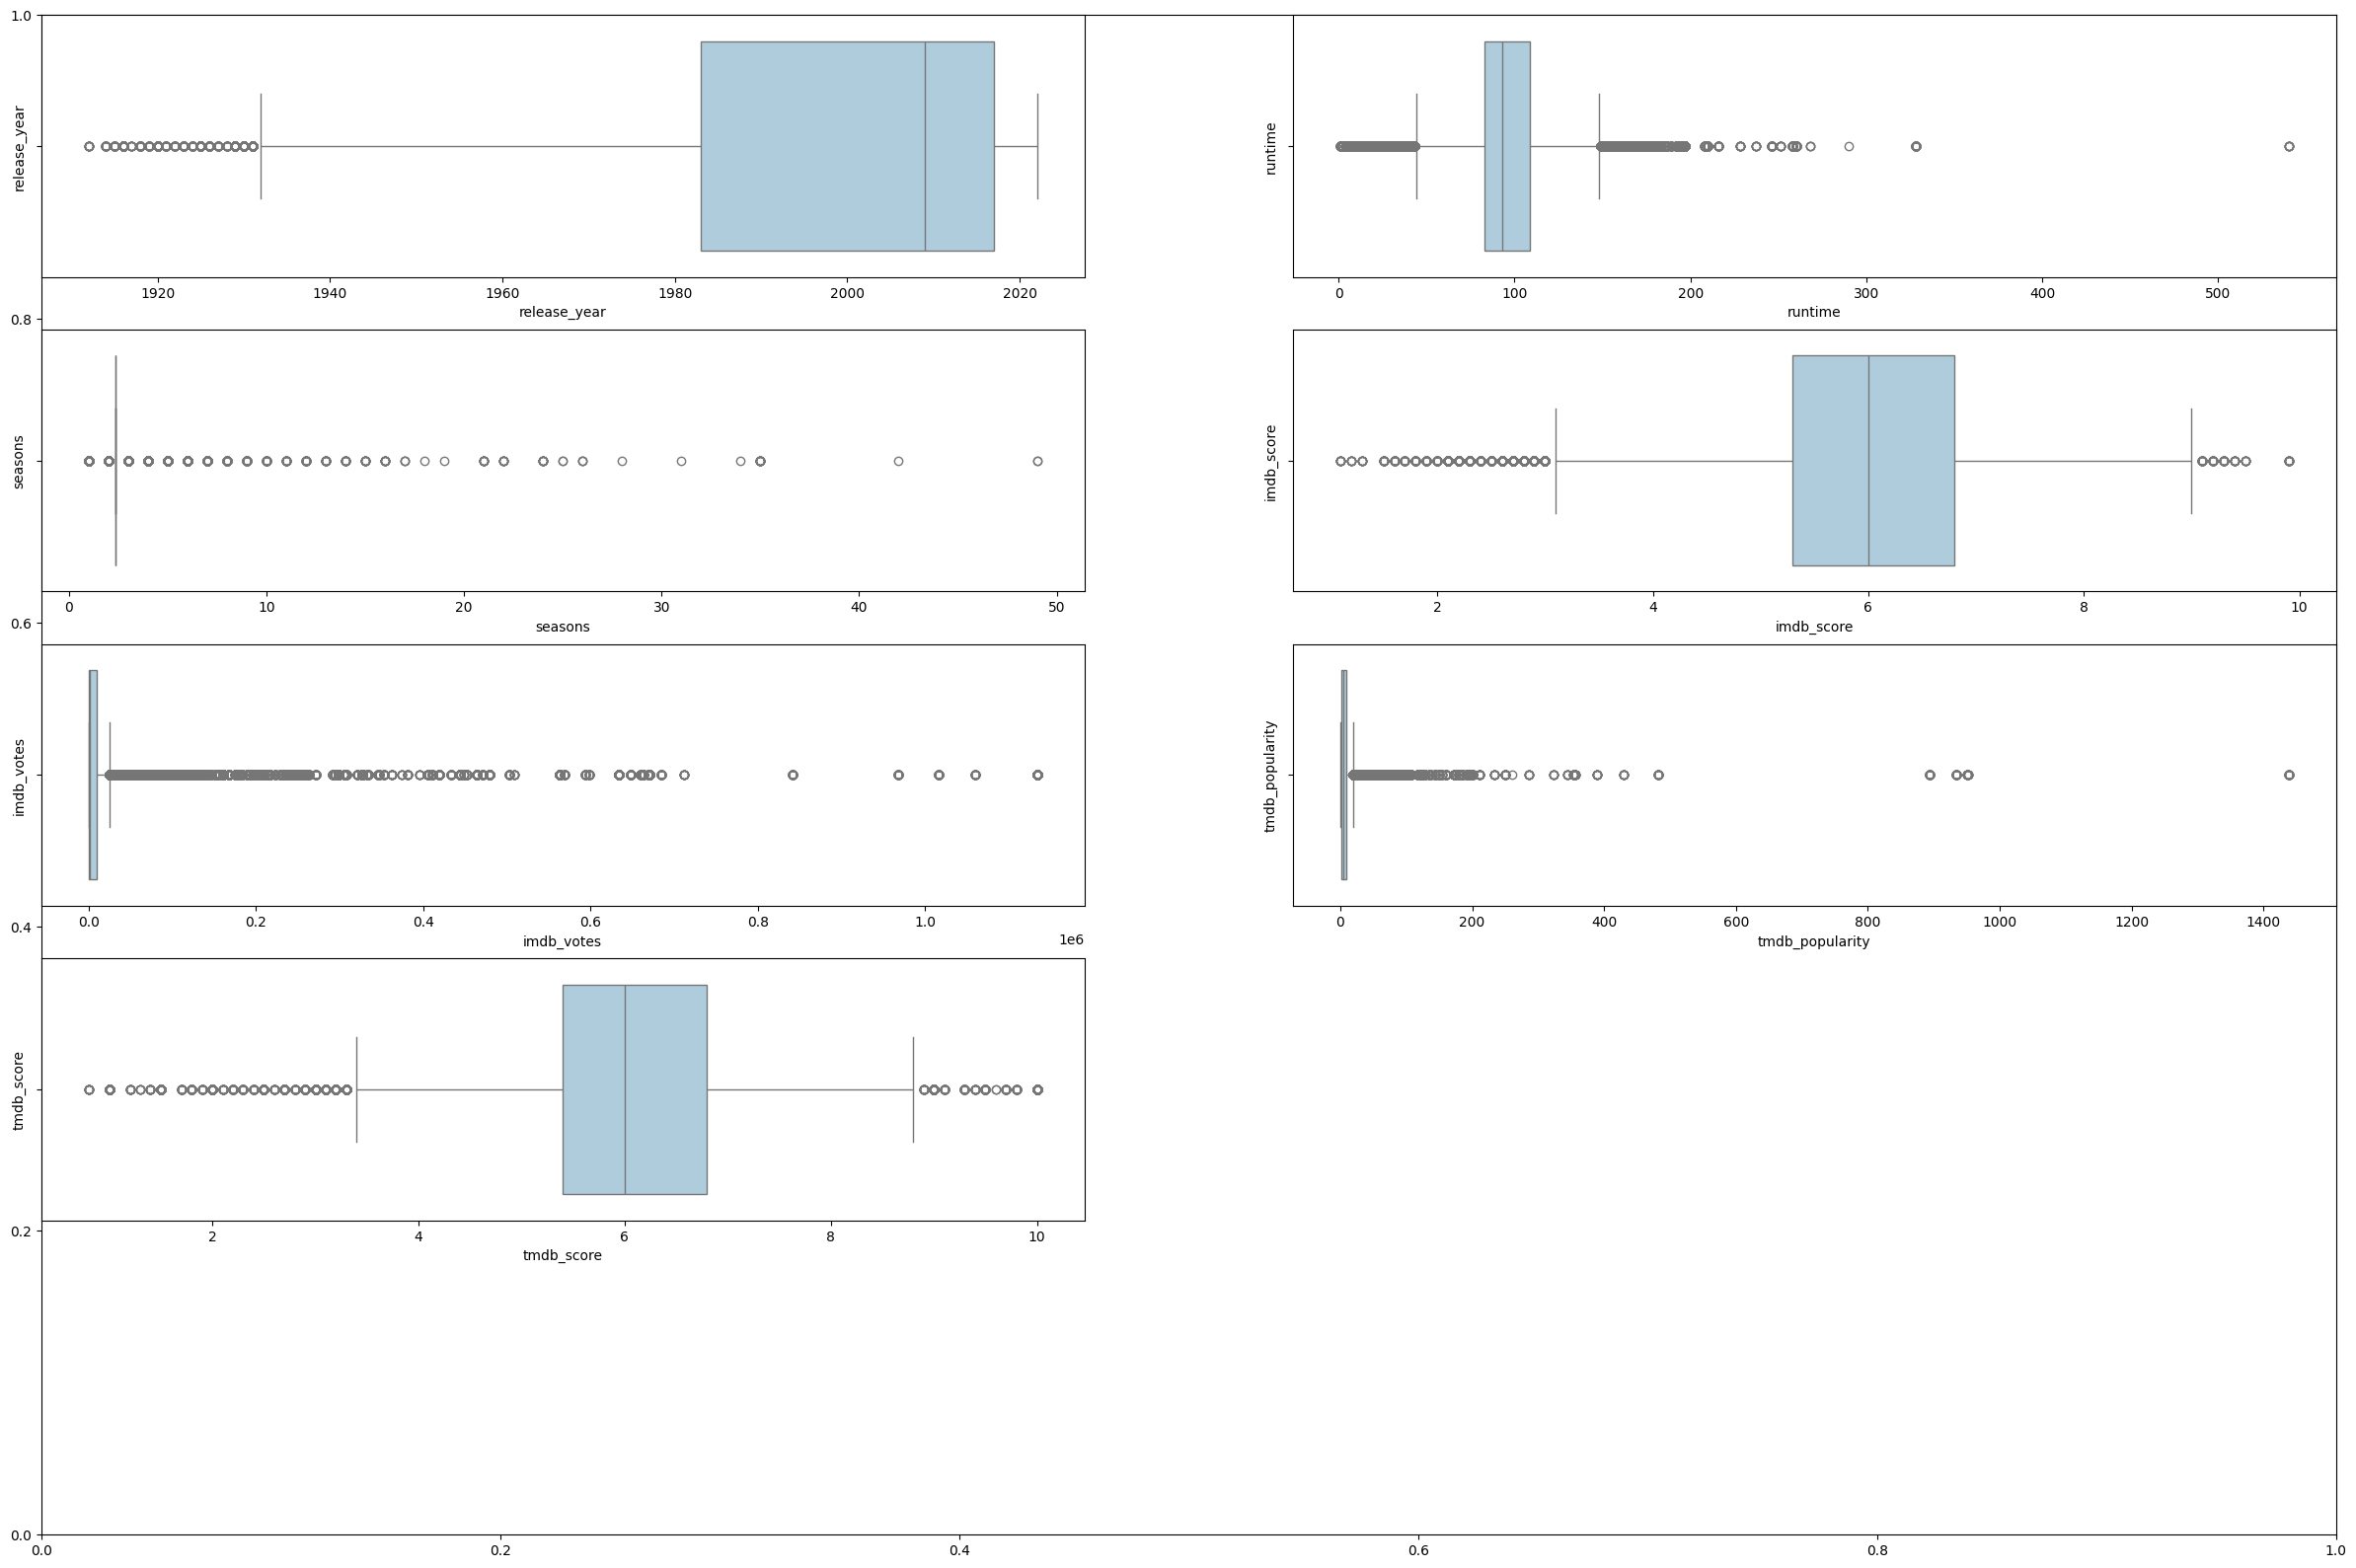

In [ ]:
plt.subplots(figsize=(30,20))
for i,col in enumerate(numeric_cols):
    plt.subplot(5,2,i+1)
    sns.boxplot(data=data,x=col,palette="Paired")
    plt.xlabel(col)
    plt.ylabel(col)
    plt.yticks(rotation=45)
plt.show()

as we can observe
'release_year' has valid range from 1930 to 2020   
'runtime' has valid range from 50 to 150   
'seasons'has valid range from 2 to 2.5  
'imdb_score' has valid range from 3 to 9   
'imdb_votes' has valid range from 0 to 0.07   
'tmdb_popularity'has valid range from 0 to 50   
'tmdb_score' has valid range from 3.5 to 9

**Violin Plot is a method to visualize the distribution of numerical data of different variables**

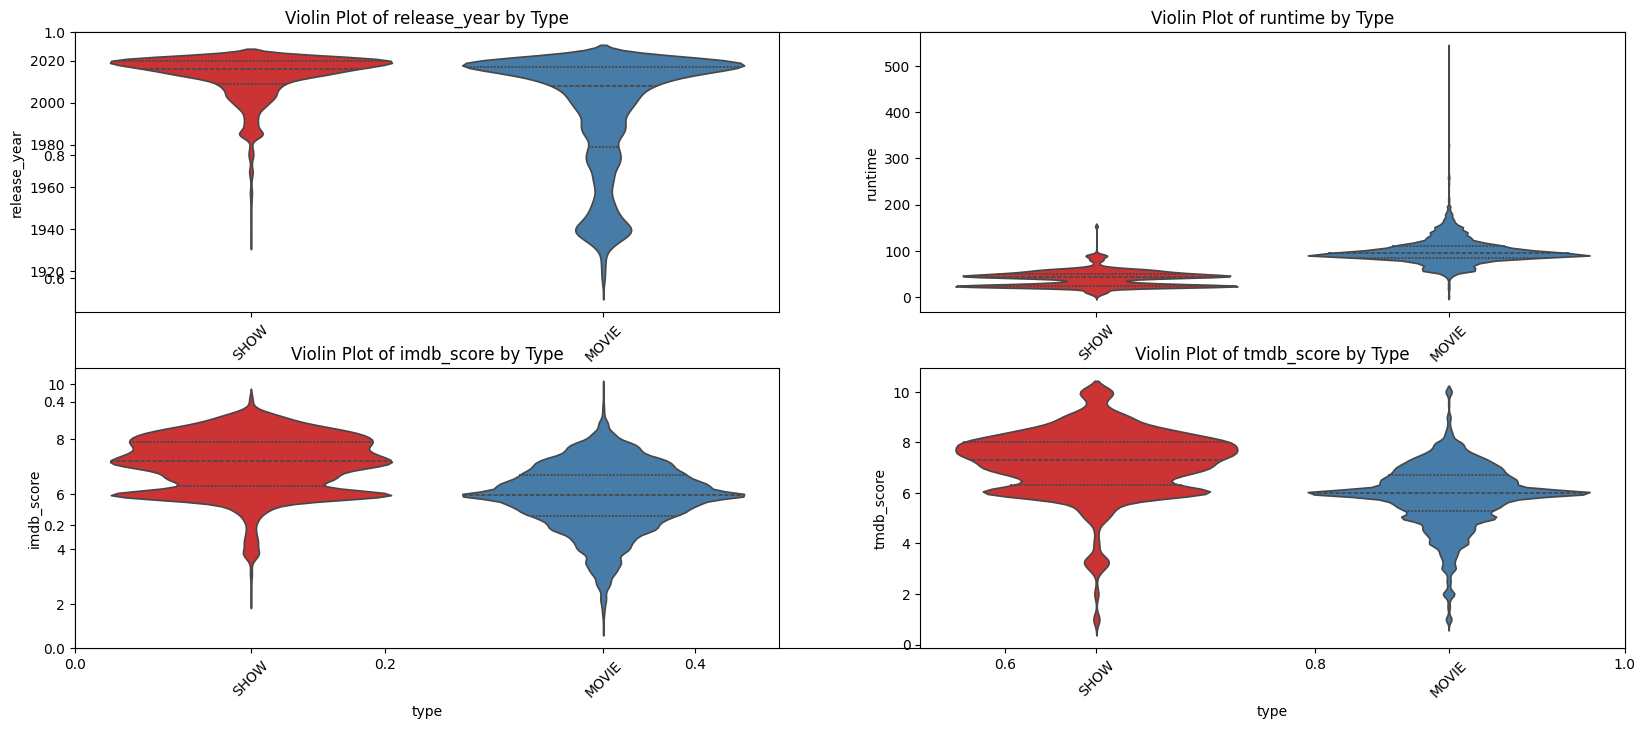

In [ ]:
features=['release_year', 'runtime','imdb_score','tmdb_score']
plt.subplots(figsize=(20,8))
for i,col in enumerate(features):
  plt.subplot(2,2,i+1)
  sns.violinplot(x='type', y=data[col], data=data,  inner="quartile",palette="Set1")
  plt.xlabel('type')
  plt.ylabel(col)
  plt.title(f'Violin Plot of {col} by Type')
  plt.xticks(rotation=45)
plt.show()

** histogram is a graph that shows how data is distributed by using bars of different heights**

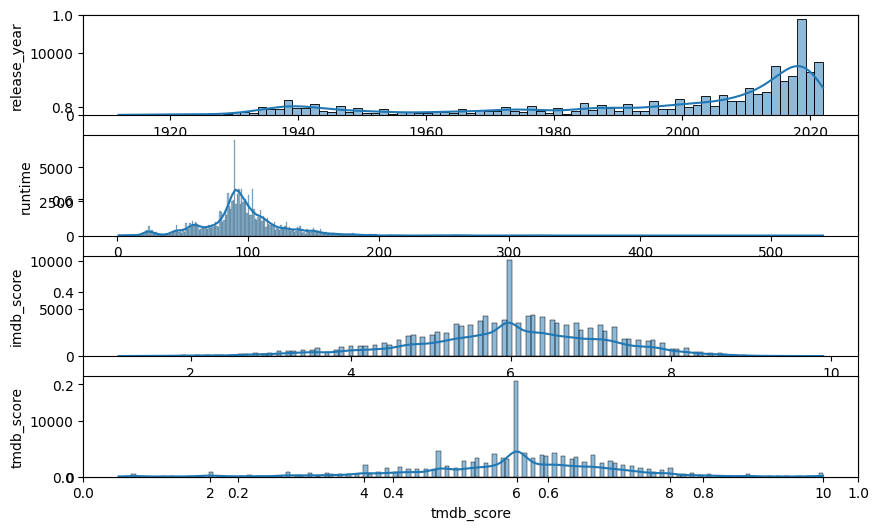

In [ ]:
features=['release_year','runtime','imdb_score','tmdb_score']
plt.subplots(figsize=(10,6))
for i,col in enumerate(features):
    plt.subplot(4,1,i+1)
    sns.histplot(data=data,x=col,kde=True)
    plt.xlabel(col)
    plt.ylabel(col)
plt.show()

we can observe imdb_score and tmdb_score are normally distributed   
runtime has outlier after 150 so it is also normally distributed   
while release_year is left skewed

#to see relationships in a dataset we use paiplot

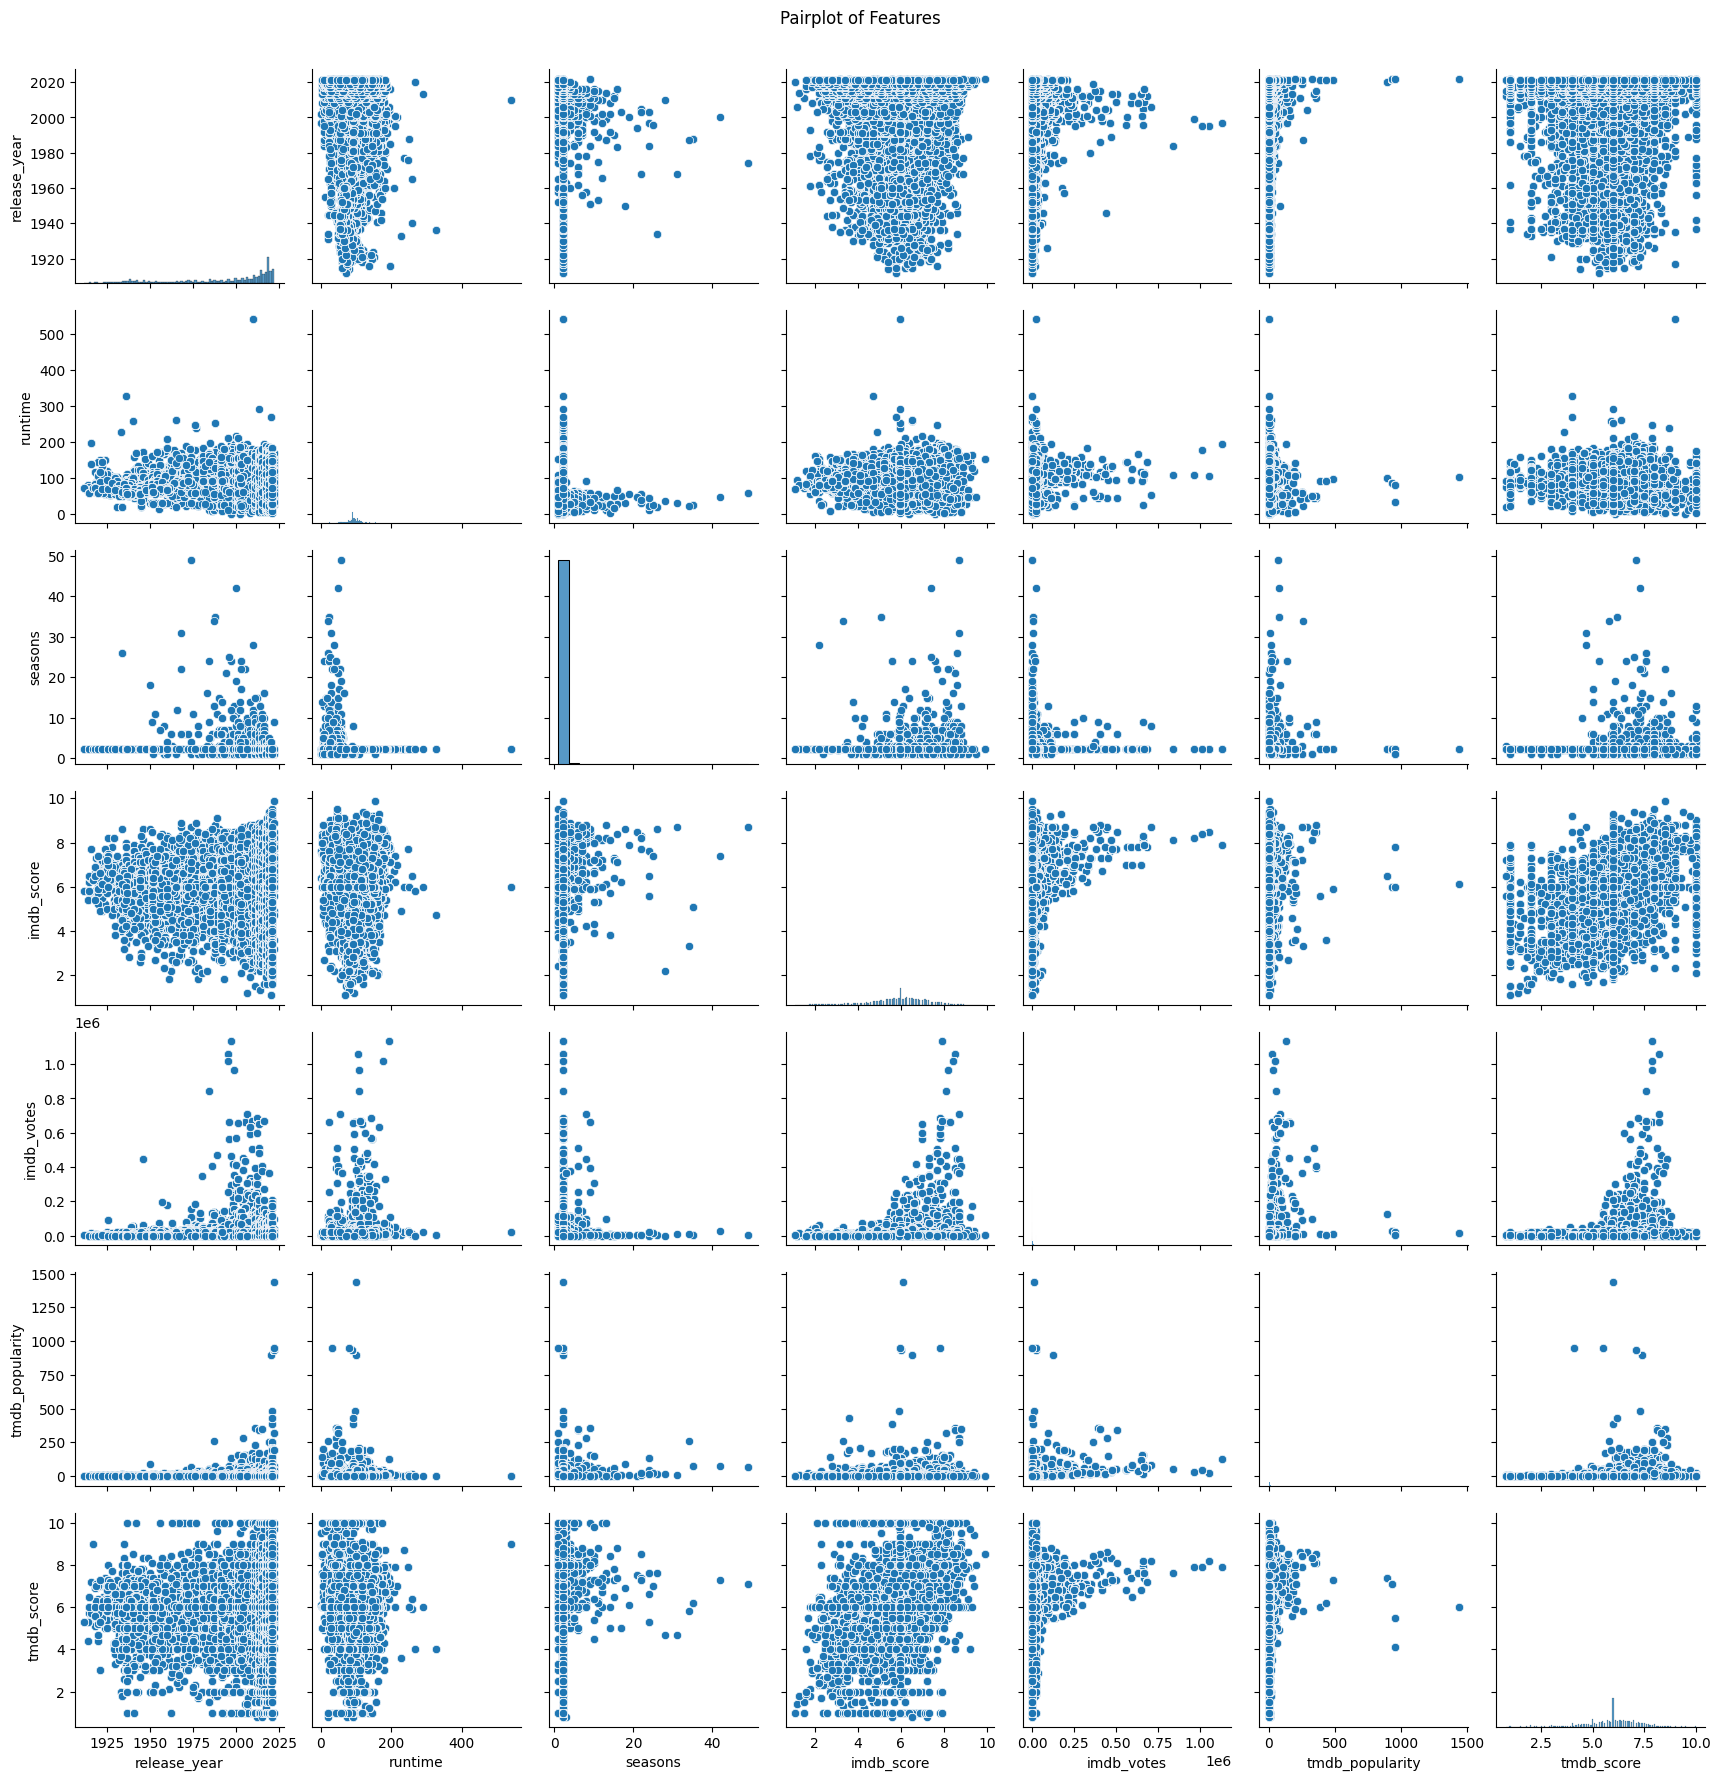

In [ ]:
def plot_pairplot(df):
    # Exclude non-numeric columns from correlation computation
    numeric_data = data.select_dtypes(include=[float, int])

    # Pairplot of the numeric features
    sns.pairplot(numeric_data)
    plt.suptitle("Pairplot of Features", y=1.02)
    plt.show()
plot_pairplot(data)


In [ ]:
data['production_countries'].head()

,production_countries
0,['US']
1,['US']
2,['US']
3,['US']
4,['US']


formating text by removing square brackets from data['production_countries'] and fill blabnks with text 'Not available'

In [ ]:
data['production_countries'] =data['production_countries'].apply(lambda x:x[2:-2])

In [ ]:
data['production_countries'] = data['production_countries'].replace('','Not_available')

In [ ]:
top_5_countries = data['production_countries'].value_counts().sort_values(ascending=False).head(6).drop('Not_available')


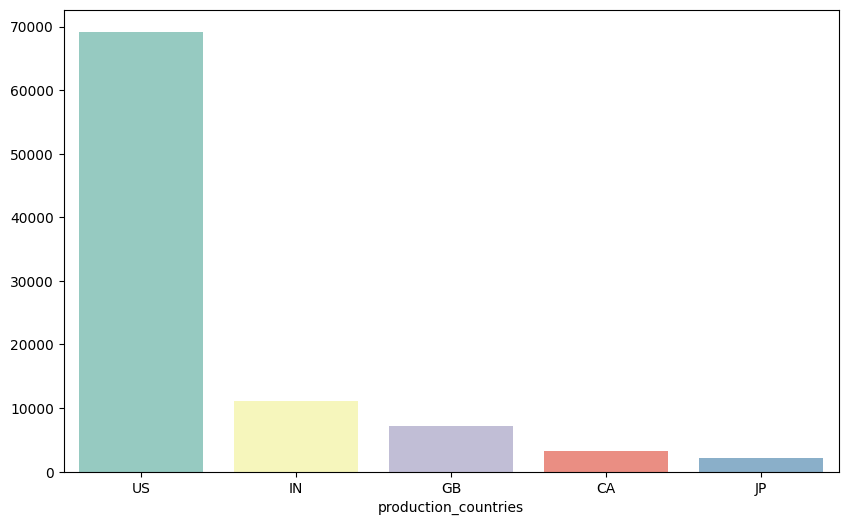

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_5_countries.index,y=top_5_countries.values,palette="Set3")
plt.show()


# US is the highest in Amazon Prime content

In [ ]:
f2=['seasons','imdb_score','tmdb_score','title','name','character']
#plt.subplots(figsize =(10,6))
for i,col in enumerate(f2):
    col_year = data.groupby([col,'release_year']).agg(col_count=(col,'count')).sort_values(by=col,ascending=False).head()
    print(col_year)
    #col_year.unstack().plot(legend=False)
    #if (i==0):
    #  plt.xlim(0,10)
    #elif(i==2):
      #plt.xlim(0.0,1.0)
      #plt.ylim(0,100)
    #col_year1 = data.groupby([col,'release_year']).agg(release_year_count=(col,'count')).sort_values(by='release_year',ascending=False).head()
    #print(col_year1)
    #col_year1.unstack().plot()
    #print(f'{col_year} \n\n {col_year1}')
#plt.show()



                      col_count
seasons release_year           
49.0    1974                  2
42.0    2000                  1
35.0    1988                 18
34.0    1987                  1
31.0    1968                  1
                         col_count
imdb_score release_year           
9.9        2022                 19
9.5        2021                  7
9.4        2021                  2
           2019                  9
9.3        2021                 27
                         col_count
tmdb_score release_year           
10.0       2022                 28
           2005                  9
           1937                 13
           1942                 35
           1956                  7
                             col_count
title          release_year           
爱，来的刚好         2017                  3
À corde tendue 2013                  9
Zoombies       2016                 19
Zoo            2018                 38
Zomblies       2010                  2
             

#Finding Trends that evolved overtime

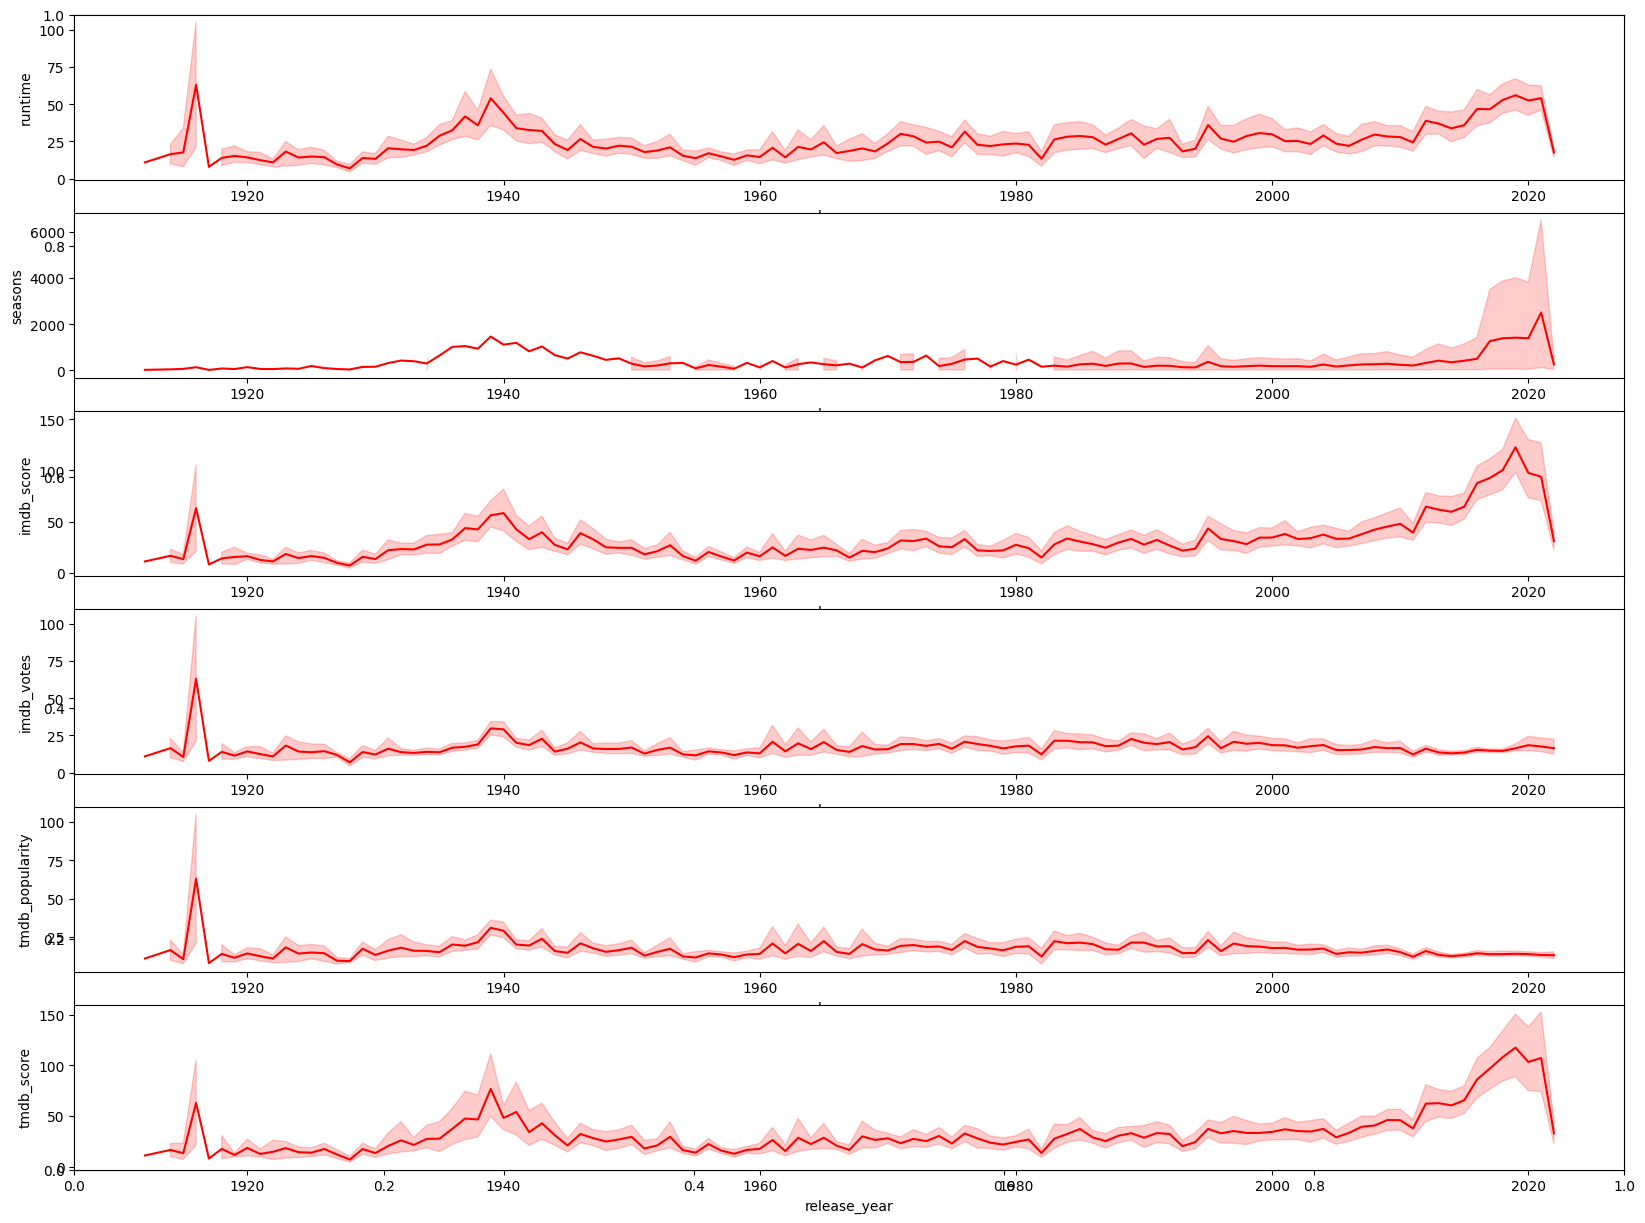

In [ ]:

features1=['runtime','seasons','imdb_score','imdb_votes','tmdb_popularity','tmdb_score']
plt.subplots(figsize=(20,15))
for i,col in enumerate(features1):
    plt.subplot(6,1,i+1)
    col_year =data.groupby(['release_year',col]).agg(col_count=('release_year','count')).sort_values(by='release_year' ,ascending=False)
    #print(col_year)
    sns.lineplot(data=col_year,x='release_year',y='col_count',color='red')

    plt.ylabel(col)
    #plt.xticks(1920,2020)

plt.show()

## we can see Peak in year 1940 and big peak in year 2018 to 2020 for runtime,seasons,imdb_score and imdb_votes

#plotting runtime Vs Type

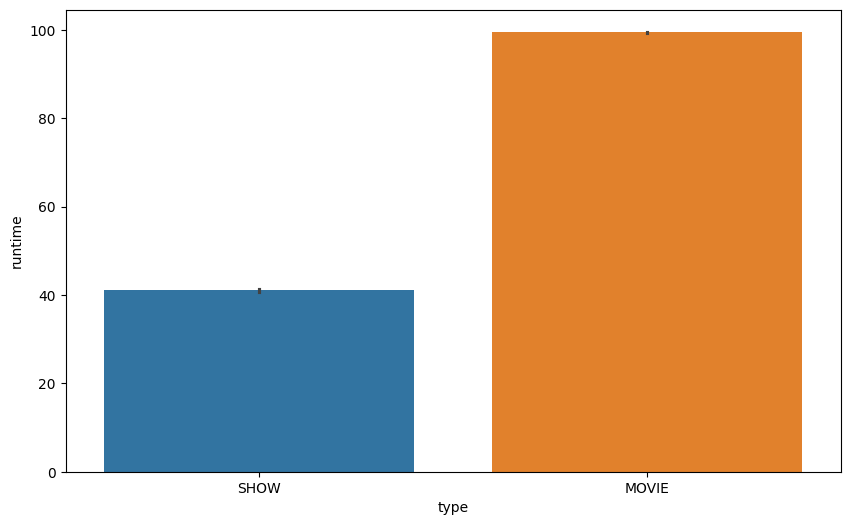

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=data,y='runtime',x='type',palette="tab10")
plt.show()


# MOVIE has more runtime than SHOW

scatterplot is used since we need to compare 2 numerical values

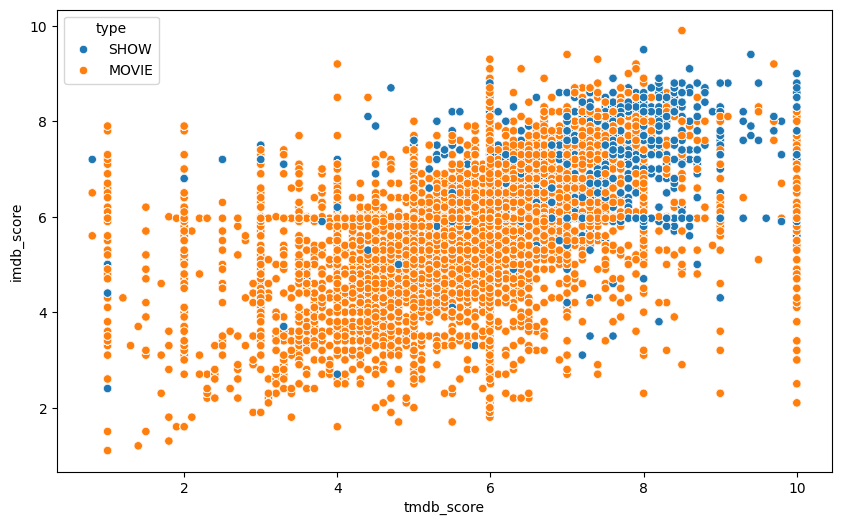

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,y='imdb_score',x='tmdb_score',hue='type',palette="tab10")
plt.show()


#SHOW has higher tmbd and imdb score

In [ ]:
data_show = data[data['type']=='SHOW']
data_movie = data[data['type']=='MOVIE']

<Figure size 1000x600 with 0 Axes>

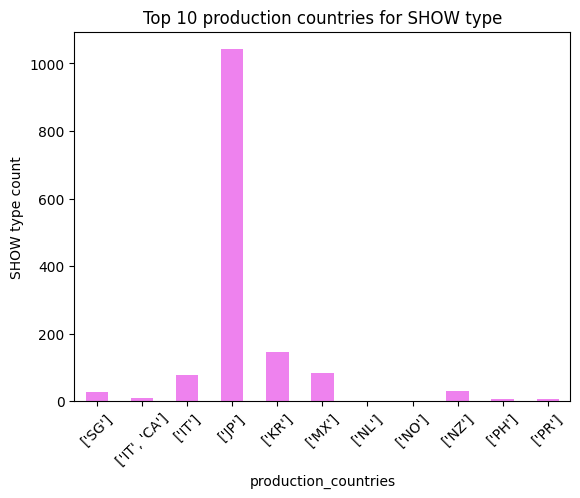

In [ ]:
country_SHOW=data_show.groupby(['production_countries','type']).agg(country_type = ('type','count')).sort_values(by='type',ascending=False)[1:].head(11)
#print(country_SHOW)
plt.figure(figsize=(10,6))
country_SHOW.unstack().plot(kind='bar',legend=False,color='violet')
plt.xticks(rotation=45)
#plt.xticks(['AR','SG','ITCA,'IT','JP','KR','MX','NL','NO','NZ'])
plt.ylabel('SHOW type count')
plt.title('Top 10 production countries for SHOW type')
plt.show()


# JP is the highest production_country for type SHOW

<Figure size 1000x600 with 0 Axes>

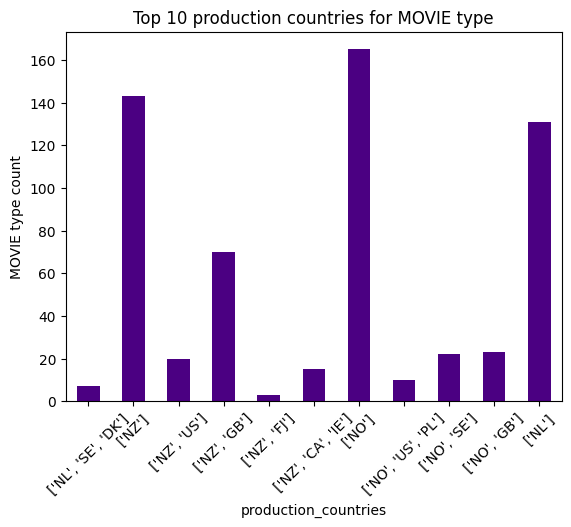

In [ ]:
country_MOVIE=data_movie.groupby(['production_countries','type']).agg(country_type = ('type','count')).sort_values(by='type',ascending=False)[1:].head(11)
#print(country_MOVIE)
plt.figure(figsize=(10,6))
country_MOVIE.unstack().plot(kind='bar',legend=False,color='indigo')
plt.ylabel('MOVIE type count')
plt.title('Top 10 production countries for MOVIE type')
plt.xticks(rotation=45)
plt.show()

# 'NO' is the highest production_country for type Movie

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i,col in enumerate(non_numeric_cols):
    data[col]=le.fit_transform(data[col])

# Heatmap to find magnitude of all variables versus all columns

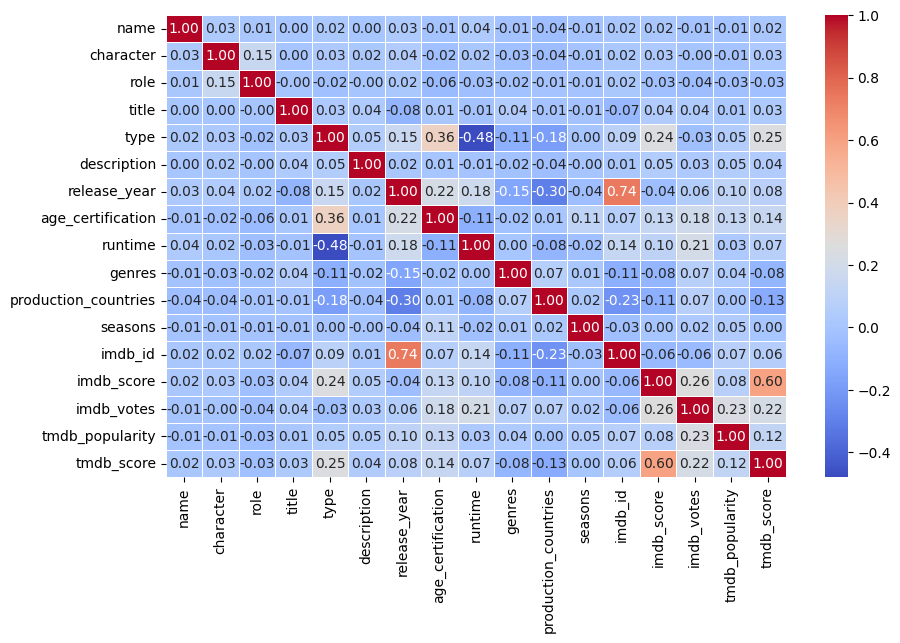

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data=data.corr(),annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

imdb_score and tmdb_score are highly corelated
age_certification and type are moderatly related

OBSERVATIONS-

the show 'title' with highest imdb_score is **'Couple of Mirrors'**   
the show 'title' with highest imdb_votes is **Dexter**                   
the show 'title' with highest tmdb_score is **Lov3**                               
the show 'title' with highest tmdb_popularity is **Harina**             
the movie 'title' with highest imdb_score is **Pawankhind**                           
the movie 'title' with highest imdb_votes is **Titanic**                
the movie 'title' with highest tmdb_score is **Man from Cheyenne**   
the movie 'title' with highest tmdb_popularity is **All the Old Knives**

the genre in show type with highest imdb_score is    **[drama', 'romance', 'crime]**

the  genre in movie type with highest imdb_score is  **[action', 'drama', 'history]**

the genre in show with highest imdb_votes is
**[drama', 'thriller', 'crime]**  

the genre in movie with highest  imdb_votes is
**[drama', 'romance]**        

the genre in show with highest  tmdb_popularity is **comedy**   

the genre in movie with highest  tmdb_popularity is **thriller**      

the genre in show with highest  tmdb_score is
**[drama', 'romance', 'comedy', 'history]**

the genre in movie with highest  tmdb_score is
**[crime', 'scifi', 'action]**  

the actor of show type with highest imdb_score is
**He Fengtian**    
the director of show type with highest imdb_score is
**Gavin Whitehead**    
the actor of show type with highest imdb_votes is **Michael C. Hall**    
the director of show type with highest imdb_votes is
**Deepak Kumar Mishra**   
the actor of show type with highest tmdb_popularity is
**Miguel Pérez Gil**   
the director of show type with highest tmdb_popularity is **Rigoberto Castañeda**   
the actor of show type with highest tmdb_score is
**Lawrence Ng**   
the director of show type with highest tmdb_score is
**Takeshi Yagi**  

the actor of movie type with highest imdb_score is **Dipti Ketkar**   
the director of movie type with highest imdb_score is **Digpal Lanjekar**   
the actor of movie type with highest imdb_votes is **Shay Duffin**   
the director of movie type with highest imdb_votes is **James Cameron**   
the actor of movie type with highest tmdb_popularity is **Kasia Madera**  
the director of movie type with highest tmdb_popularity is **Janus Metz**   
the actor of movie type with highest tmdb_score is **"Daddy" Gene Jackson**  
the director of movie type with highest tmdb_score is **Mohammad Hadi Karimi**

in type SHOW, **Drama** is the most watched Genre on Amazon Prime

in type MOVIE, **Drama** is the most watched Genre on Amazon Prime

Actor **Takahiro Sakurai** has highest number of SHOWS  on Amazon Prime

Director **Paul Alter** has highest number of SHOWS  on Amazon Prime

Actor  **George 'Gabby' Hayes** has highest number of MOVIES on Amazon Prime

Director  **Joseph Kane**  has highest number of MOVIES  on Amazon Prime

the most watched title of Type Show is **Tall Tales & Legends**  

the most watched title of Type Movie is **"Coming 2 America"**

**US** is the highest in Amazon Prime content

MOVIE has more runtime than SHOW

SHOW has higher tmbd and imdb score

**JP** is the highest production_country for type SHOW

**'NO'** is the highest production_country for type Movie

High imdb_score means highest watched genre of type movie

imdb_score,imdb_votes is not related to actor popularity

top 5 directors of type show has received scores between 7.7 to 8.8

**drama', 'romance** genre has highest votes but still it not highest watched Genre, this means there is no positive correlation between genre and imdb_votes

high tmdb_score impacts genre popularity in SHOW type

high tmdb_score impacts genre popularity in MOVIE type

titles are not impacted by tmdb_score